<a href="https://colab.research.google.com/github/ChaithraUmesh21/Ansible-Apache-docker/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries and Load Data**
This block imports all necessary libraries and loads the dataset from a specified CSV file.

*Dataset Source - https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset*

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt



In [55]:
# Load the dataset

data = pd.read_csv('online_gaming.csv')



In [69]:
print(data.head())

   PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                   

### DATA EXPLORATION

In [70]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [77]:
df = pd.read_csv('online_gaming.csv')

for i in df.columns:
  print(i, df[i].nunique())

PlayerID 40034
Age 35
Gender 2
Location 4
GameGenre 5
PlayTimeHours 40034
InGamePurchases 2
GameDifficulty 3
SessionsPerWeek 20
AvgSessionDurationMinutes 170
PlayerLevel 99
AchievementsUnlocked 50
EngagementLevel 3


In [78]:
df.isnull().sum()

,0
PlayerID,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0


In [80]:
df['Gender'].value_counts()

,count
Gender,
Male,23959
Female,16075


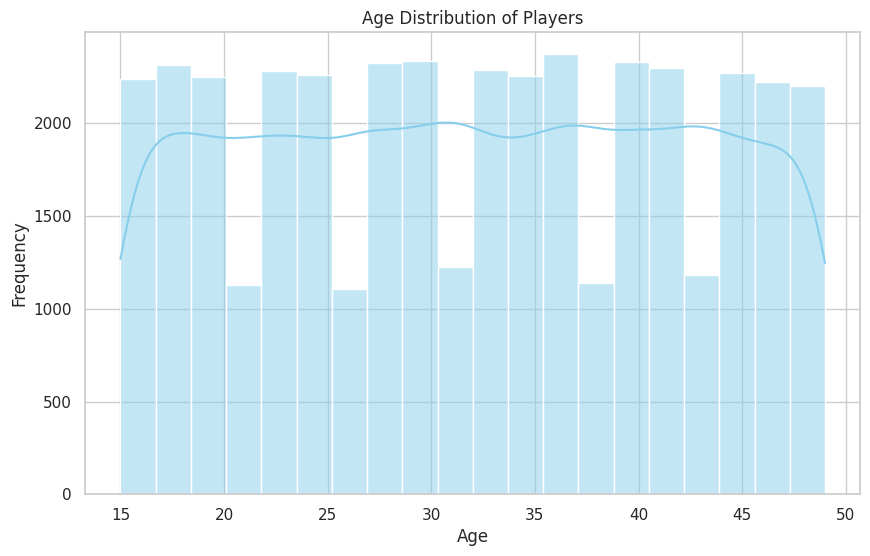

In [85]:
#Set the style for seaborn
sns.set(style="whitegrid")

# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-87-93da7842929a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='GameGenre', y='PlayTimeHours', palette='viridis')


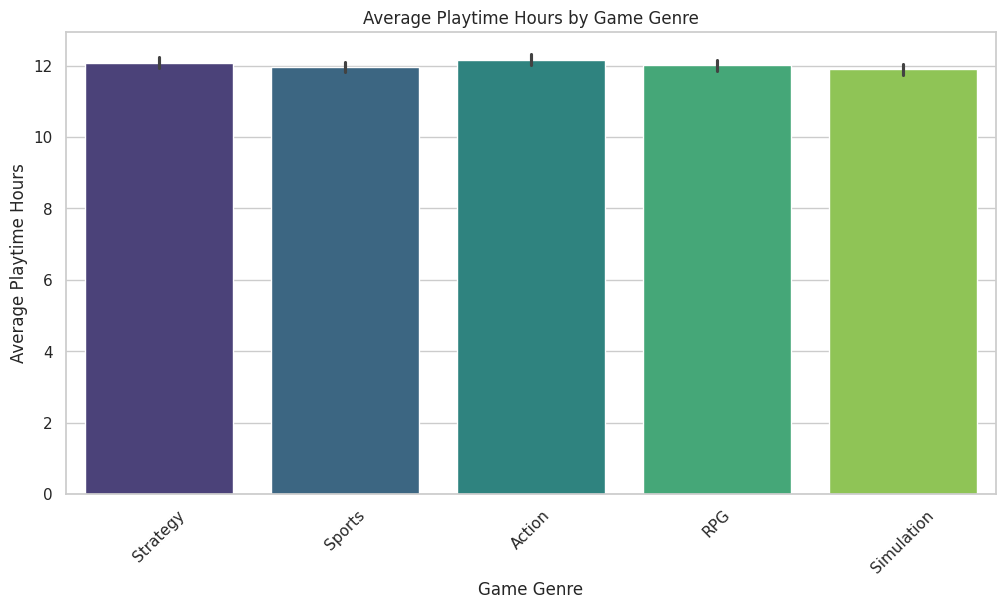

In [87]:
# Bar Plot of Average Playtime Hours by Game Genre
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='GameGenre', y='PlayTimeHours', palette='viridis')
plt.title('Average Playtime Hours by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Average Playtime Hours')
plt.xticks(rotation=45)
plt.show()


<ipython-input-88-5b6182d01f67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EngagementLevel', y='PlayTimeHours', palette='coolwarm')


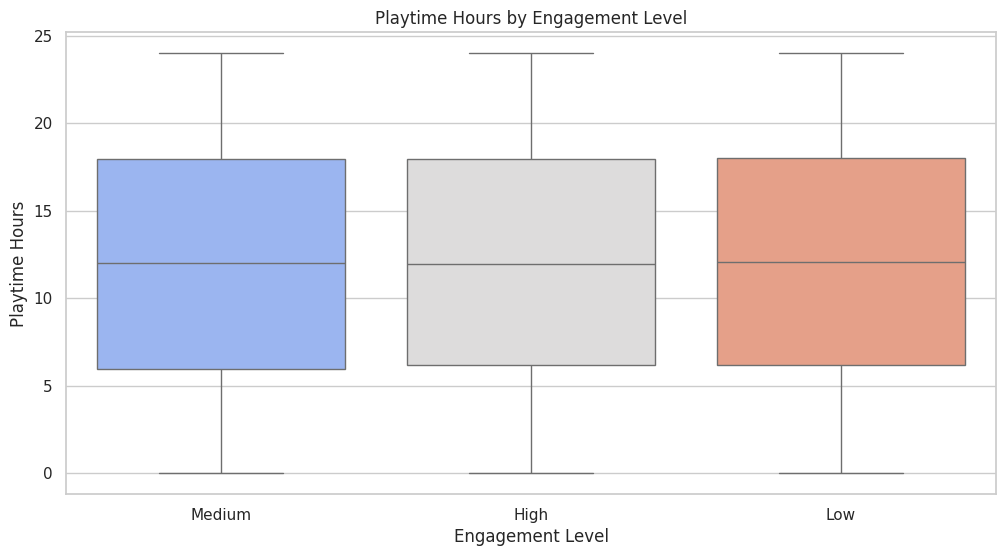

In [88]:
# Box Plot of Playtime Hours by Engagement Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EngagementLevel', y='PlayTimeHours', palette='coolwarm')
plt.title('Playtime Hours by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Playtime Hours')
plt.show()


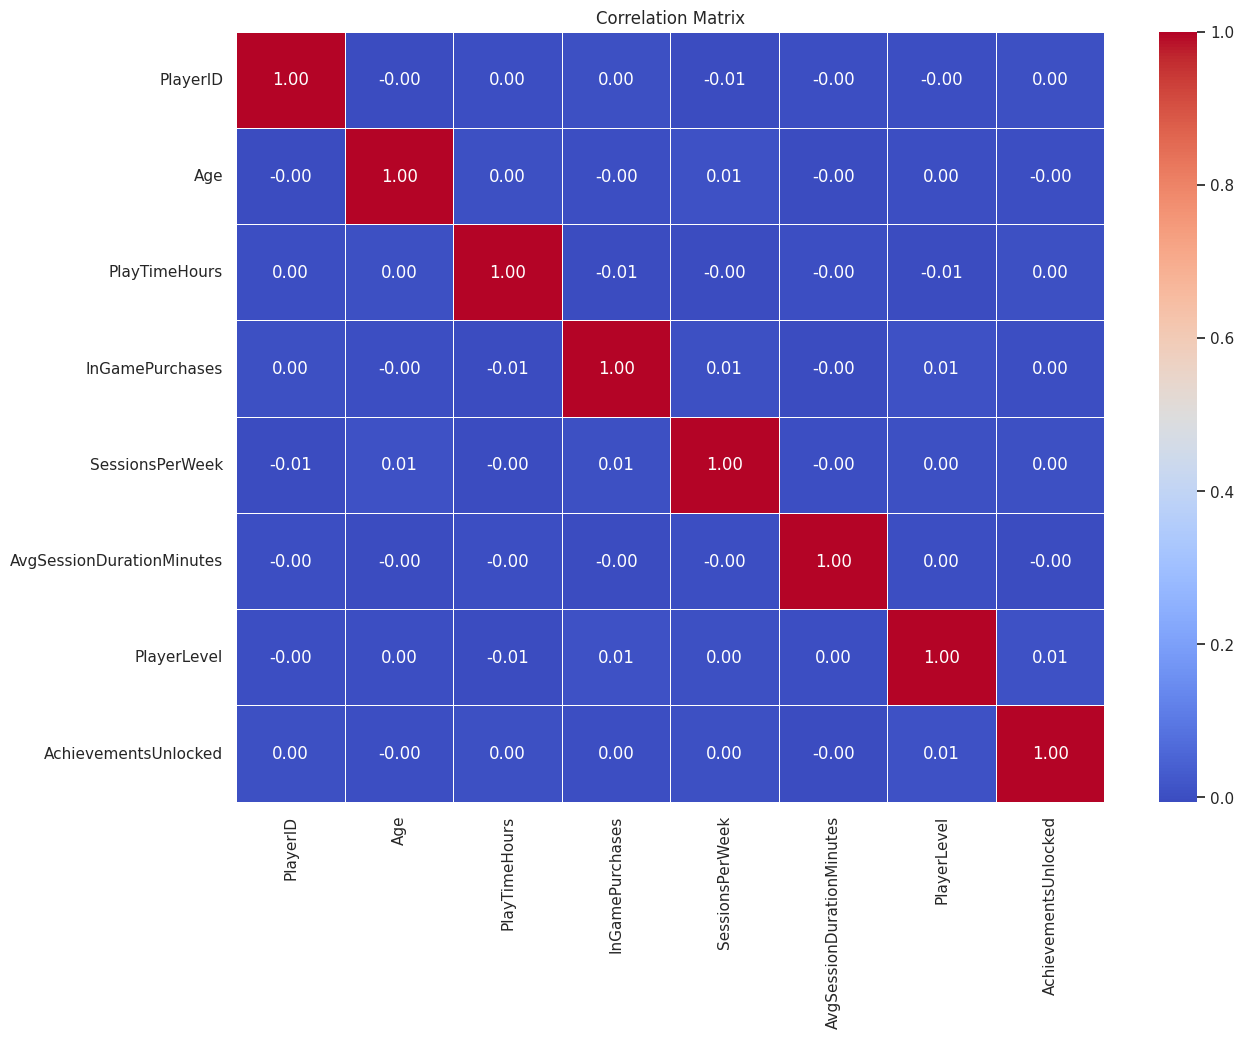

In [89]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(14, 10))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


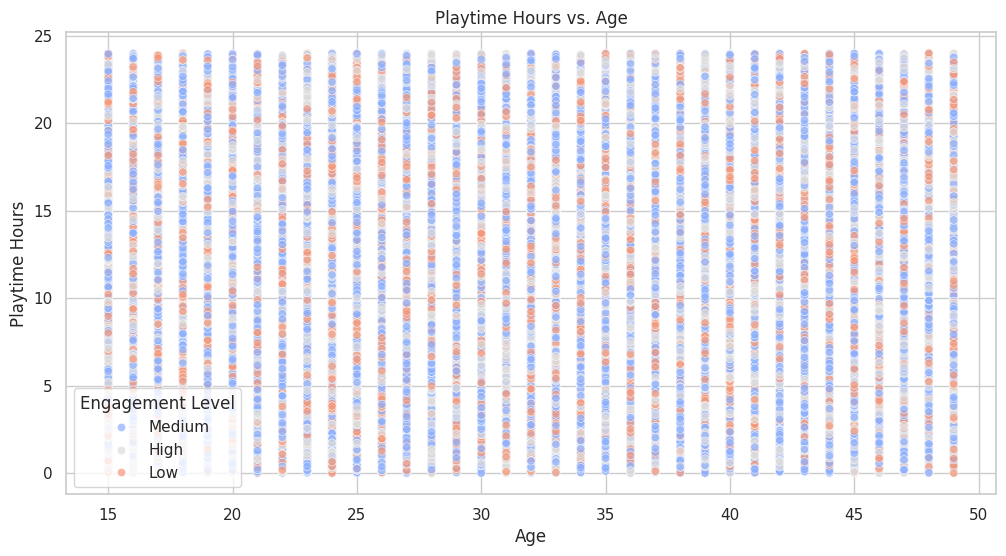

In [90]:
# Scatter Plot of Playtime Hours vs. Age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='PlayTimeHours', hue='EngagementLevel', palette='coolwarm', alpha=0.7)
plt.title('Playtime Hours vs. Age')
plt.xlabel('Age')
plt.ylabel('Playtime Hours')
plt.legend(title='Engagement Level')
plt.show()

### **Data Preprocessing**
This block handles encoding of categorical variables, imputes missing values, and scales numerical features for model training.

In [102]:
label_encoders = {}
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for column in categorical_columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

print("\nAfter Encoding Categorical Variables:")
print(data_encoded.head())
print("\nLabel Encoders used:")
for column, encoder in label_encoders.items():
    print(f"{column}: {list(encoder.classes_)}")



After Encoding Categorical Variables:
   PlayerID       Age  Gender  Location  GameGenre  PlayTimeHours  \
0      9000  1.096023       1         2          4       0.614176   
1      9001 -0.297969       0         3          4      -0.939816   
2      9002 -0.994965       0         3          3      -0.549654   
3      9003  0.299456       1         3          0      -0.977506   
4      9004  0.100314       1         1          0       0.507275   

   InGamePurchases  GameDifficulty  SessionsPerWeek  \
0        -0.501334               2        -0.602363   
1        -0.501334               2        -0.775865   
2        -0.501334               0         1.132666   
3         1.994676               0        -0.081854   
4        -0.501334               2        -1.296374   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                   0.269487     1.026459              0.032814   
1                   1.004019    -1.352160             -1.006648   
2             

In [96]:
# Handling missing values (if any) after encoding
imputer = SimpleImputer(strategy='mean')
numerical_columns = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
data_encoded[numerical_columns] = imputer.fit_transform(data_encoded[numerical_columns])

print("\nMissing values after imputation:")
print(data_encoded[numerical_columns].isnull().sum())


Missing values after imputation:
Age                          0
PlayTimeHours                0
InGamePurchases              0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
dtype: int64


### **Splitting the Data**
This block splits the data into training and testing sets for each prediction task (player engagement, in-game purchases, playtime, and player level).

In [98]:

# Feature scaling for numerical variables
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

print("\nSample of data after scaling:")
print(data_encoded[numerical_columns].head())


Sample of data after scaling:
        Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
0  1.096023       0.614176        -0.501334        -0.602363   
1 -0.297969      -0.939816        -0.501334        -0.775865   
2 -0.994965      -0.549654        -0.501334         1.132666   
3  0.299456      -0.977506         1.994676        -0.081854   
4  0.100314       0.507275        -0.501334        -1.296374   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  
0                   0.269487     1.026459              0.032814  
1                   1.004019    -1.352160             -1.006648  
2                   0.963212    -0.512647              1.141573  
3                  -0.199798     0.256906              1.557358  
4                   0.738771     1.586134              0.864383  


In [99]:
# Splitting the data for each prediction task

# Predicting Player Engagement
X_engagement = data_encoded.drop(['EngagementLevel', 'PlayerID'], axis=1)
y_engagement = data_encoded['EngagementLevel']
X_train_engagement, X_test_engagement, y_train_engagement, y_test_engagement = train_test_split(X_engagement, y_engagement, test_size=0.2, random_state=42)

# Predicting In-Game Purchases
X_purchases = data_encoded.drop(['InGamePurchases', 'PlayerID'], axis=1)
y_purchases = data_encoded['InGamePurchases']
X_train_purchases, X_test_purchases, y_train_purchases, y_test_purchases = train_test_split(X_purchases, y_purchases, test_size=0.2, random_state=42)

# Predicting Playtime
X_playtime = data_encoded.drop(['PlayTimeHours', 'PlayerID'], axis=1)
y_playtime = data_encoded['PlayTimeHours']
X_train_playtime, X_test_playtime, y_train_playtime, y_test_playtime = train_test_split(X_playtime, y_playtime, test_size=0.2, random_state=42)

# Predicting Player Level
X_level = data_encoded.drop(['PlayerLevel', 'PlayerID'], axis=1)
y_level = data_encoded['PlayerLevel']
X_train_level, X_test_level, y_train_level, y_test_level = train_test_split(X_level, y_level, test_size=0.2, random_state=42)

In [100]:
print("\nIn-Game Purchases Prediction Data Split:")
print(f"Training Features Shape: {X_train_purchases.shape}")
print(f"Test Features Shape: {X_test_purchases.shape}")
print(f"Training Labels Shape: {y_train_purchases.shape}")
print(f"Test Labels Shape: {y_test_purchases.shape}")


In-Game Purchases Prediction Data Split:
Training Features Shape: (32027, 11)
Test Features Shape: (8007, 11)
Training Labels Shape: (32027,)
Test Labels Shape: (8007,)


### **Model Training and Evaluation for In-Game Purchases (Regression)**
This block trains and evaluates linear regression, random forest, and gradient boosting models for predicting in-game purchases. It prints predictions and plots bar charts for MAE, MSE, and R² metrics.

Linear Regression Predictions (Purchases): [ 0.00339428 -0.04904786 -0.00359991 ...  0.02201099 -0.03982747
 -0.00202752]
Random Forest Predictions (Purchases): [ 0.04778794  0.34730924  0.34730924 ... -0.10197271  0.17258848
 -0.0770126 ]
Gradient Boosting Predictions (Purchases): [-0.05231578 -0.02610404 -0.00489934 ...  0.00527505  0.00398845
  0.01791842]
In-Game Purchases Prediction Metrics
               Model       MAE       MSE        R2
0  Linear Regression  0.804123  1.010118 -0.000034
1      Random Forest  0.843637  1.045092 -0.034659
2  Gradient Boosting  0.804479  1.013932 -0.003810


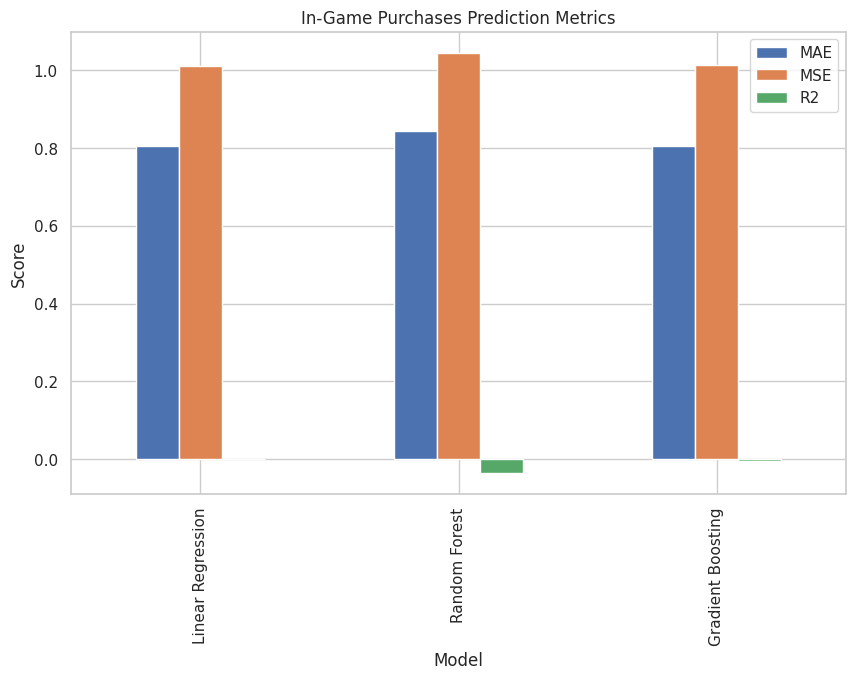

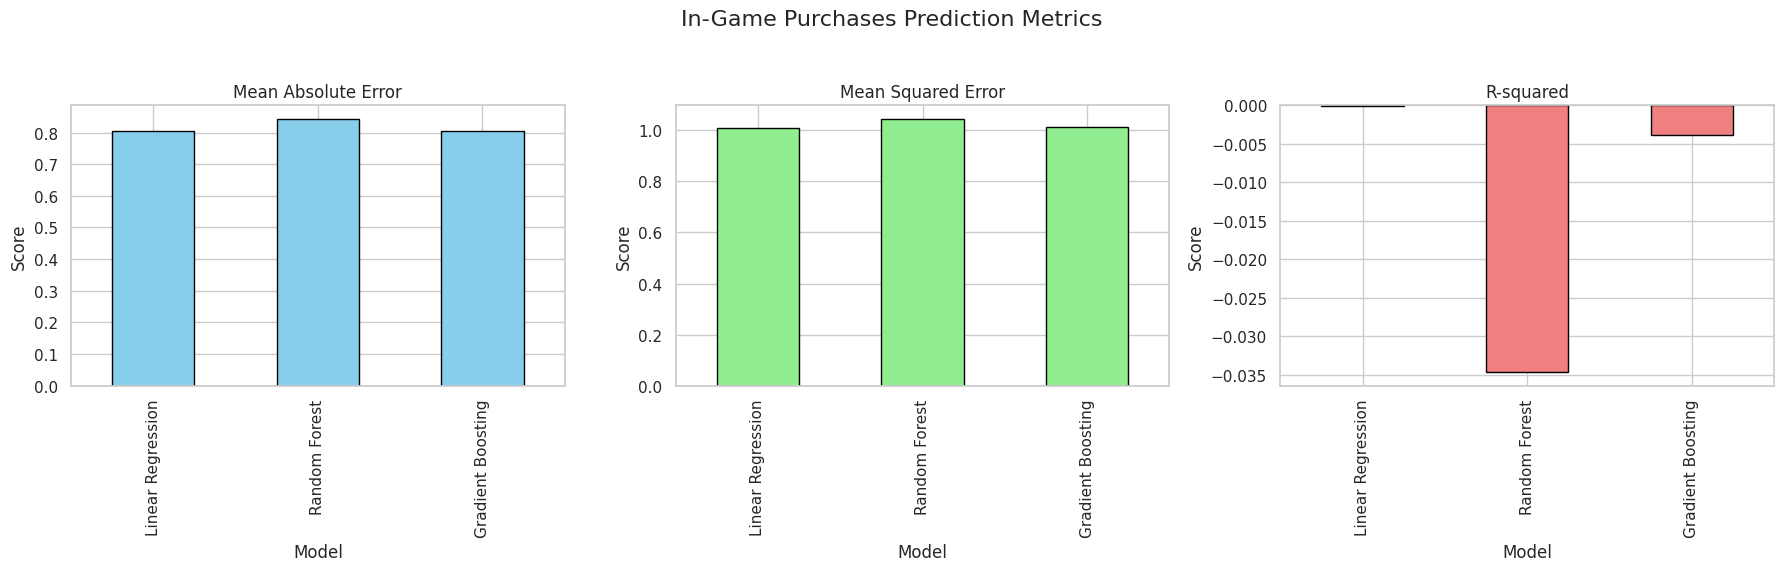

In [103]:
# Define models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)

# Train and evaluate Linear Regression for Purchases
lin_reg.fit(X_train_purchases, y_train_purchases)
y_pred_lin_reg = lin_reg.predict(X_test_purchases)
lin_reg_metrics = {
    'Model': 'Linear Regression',
    'MAE': mean_absolute_error(y_test_purchases, y_pred_lin_reg),
    'MSE': mean_squared_error(y_test_purchases, y_pred_lin_reg),
    'R2': r2_score(y_test_purchases, y_pred_lin_reg)
}
print("Linear Regression Predictions (Purchases):", y_pred_lin_reg)

# Train and evaluate Random Forest for Purchases
rf_reg.fit(X_train_purchases, y_train_purchases)
y_pred_rf_reg = rf_reg.predict(X_test_purchases)
rf_reg_metrics = {
    'Model': 'Random Forest',
    'MAE': mean_absolute_error(y_test_purchases, y_pred_rf_reg),
    'MSE': mean_squared_error(y_test_purchases, y_pred_rf_reg),
    'R2': r2_score(y_test_purchases, y_pred_rf_reg)
}
print("Random Forest Predictions (Purchases):", y_pred_rf_reg)

# Train and evaluate Gradient Boosting for Purchases
gb_reg.fit(X_train_purchases, y_train_purchases)
y_pred_gb_reg = gb_reg.predict(X_test_purchases)
gb_reg_metrics = {
    'Model': 'Gradient Boosting',
    'MAE': mean_absolute_error(y_test_purchases, y_pred_gb_reg),
    'MSE': mean_squared_error(y_test_purchases, y_pred_gb_reg),
    'R2': r2_score(y_test_purchases, y_pred_gb_reg)
}
print("Gradient Boosting Predictions (Purchases):", y_pred_gb_reg)

# Collecting metrics
purchases_metrics_df = pd.DataFrame([lin_reg_metrics, rf_reg_metrics, gb_reg_metrics])

# Displaying Purchases Metrics
print("In-Game Purchases Prediction Metrics")
print(purchases_metrics_df)

# Plotting Purchases Metrics
purchases_metrics_df.set_index('Model')[['MAE', 'MSE', 'R2']].plot(kind='bar', figsize=(10, 6))
plt.title('In-Game Purchases Prediction Metrics')
plt.ylabel('Score')
plt.show()

# Plotting Purchases Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE
purchases_metrics_df.set_index('Model')['MAE'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('Score')

# MSE
purchases_metrics_df.set_index('Model')['MSE'].plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Mean Squared Error')
axes[1].set_ylabel('Score')

# R2
purchases_metrics_df.set_index('Model')['R2'].plot(kind='bar', ax=axes[2], color='lightcoral', edgecolor='black')
axes[2].set_title('R-squared')
axes[2].set_ylabel('Score')

plt.suptitle('In-Game Purchases Prediction Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Model Training and Evaluation for Playtime (Regression)**
This block trains and evaluates linear regression, random forest, and gradient boosting models for predicting playtime. It prints predictions and plots line charts for MAE, MSE, and R² metrics.

Linear Regression Predictions (Playtime): [-0.01947416 -0.00984079  0.02021502 ... -0.02237193 -0.01867753
 -0.03969081]
Random Forest Predictions (Playtime): [-0.17498509  0.11525306  0.0353197  ... -0.25707573 -0.21442857
 -0.0321219 ]
Gradient Boosting Predictions (Playtime): [ 0.03572131  0.03057097 -0.00732038 ... -0.01980121 -0.05429791
 -0.07099255]
Playtime Prediction Metrics
               Model       MAE       MSE        R2
0  Linear Regression  0.863773  0.995223 -0.000120
1      Random Forest  0.870107  1.024848 -0.029890
2  Gradient Boosting  0.865088  0.998938 -0.003854


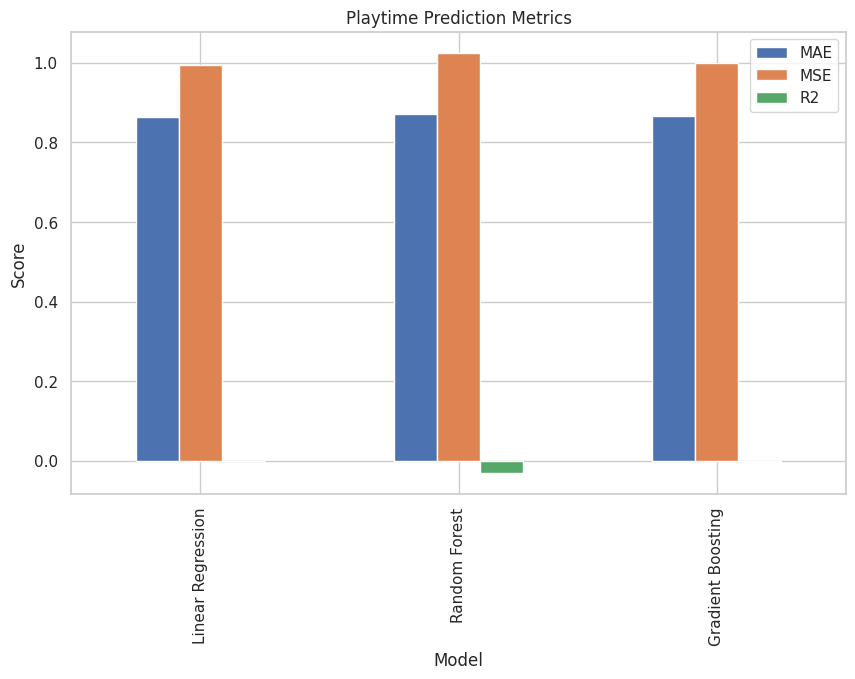

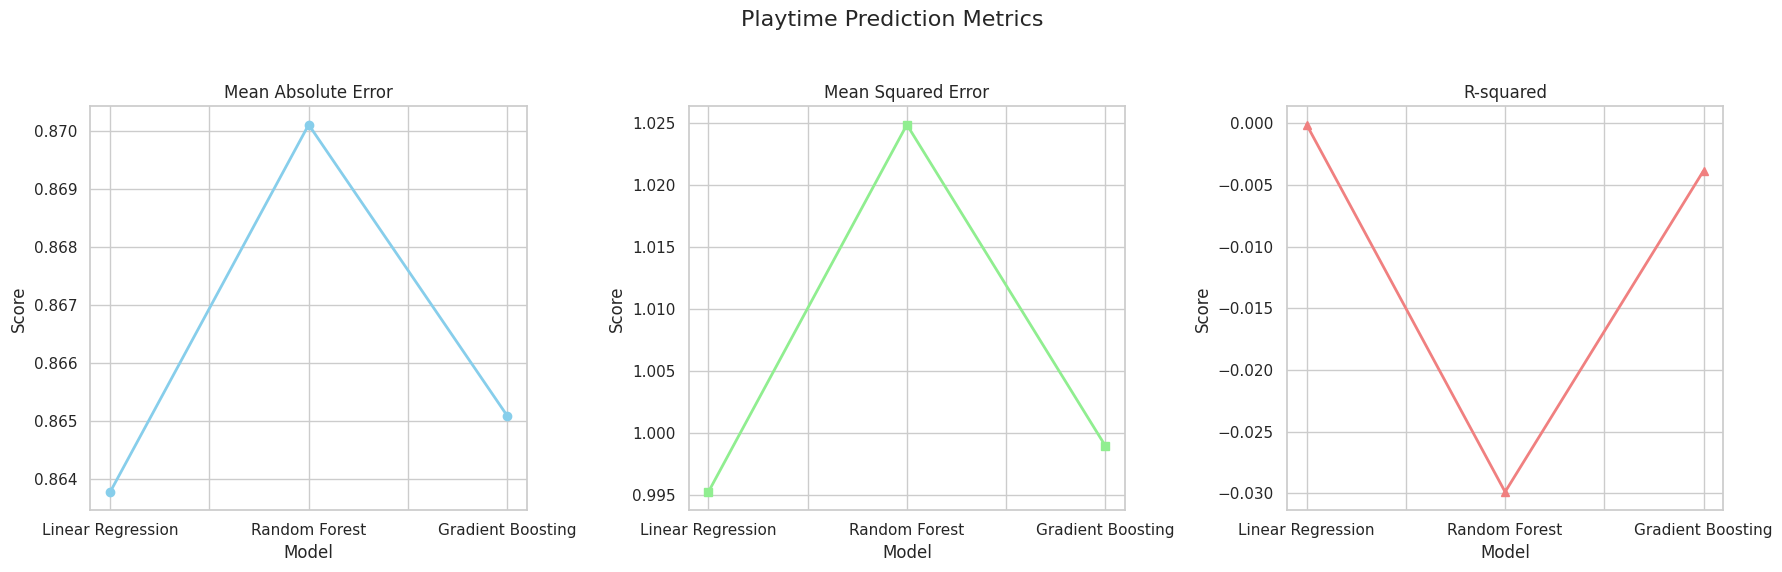

In [104]:
# Train and evaluate Linear Regression for Playtime (continued)
lin_reg.fit(X_train_playtime, y_train_playtime)
y_pred_lin_reg_playtime = lin_reg.predict(X_test_playtime)

lin_reg_playtime_metrics = {
    'Model': 'Linear Regression',
    'MAE': mean_absolute_error(y_test_playtime, y_pred_lin_reg_playtime),
    'MSE': mean_squared_error(y_test_playtime, y_pred_lin_reg_playtime),
    'R2': r2_score(y_test_playtime, y_pred_lin_reg_playtime)
}
print("Linear Regression Predictions (Playtime):", y_pred_lin_reg_playtime)

# Train and evaluate Random Forest for Playtime
rf_reg.fit(X_train_playtime, y_train_playtime)
y_pred_rf_reg_playtime = rf_reg.predict(X_test_playtime)
rf_reg_playtime_metrics = {
    'Model': 'Random Forest',
    'MAE': mean_absolute_error(y_test_playtime, y_pred_rf_reg_playtime),
    'MSE': mean_squared_error(y_test_playtime, y_pred_rf_reg_playtime),
    'R2': r2_score(y_test_playtime, y_pred_rf_reg_playtime)
}
print("Random Forest Predictions (Playtime):", y_pred_rf_reg_playtime)

# Train and evaluate Gradient Boosting for Playtime
gb_reg.fit(X_train_playtime, y_train_playtime)
y_pred_gb_reg_playtime = gb_reg.predict(X_test_playtime)
gb_reg_playtime_metrics = {
    'Model': 'Gradient Boosting',
    'MAE': mean_absolute_error(y_test_playtime, y_pred_gb_reg_playtime),
    'MSE': mean_squared_error(y_test_playtime, y_pred_gb_reg_playtime),
    'R2': r2_score(y_test_playtime, y_pred_gb_reg_playtime)
}
print("Gradient Boosting Predictions (Playtime):", y_pred_gb_reg_playtime)

# Collecting metrics
playtime_metrics_df = pd.DataFrame([lin_reg_playtime_metrics, rf_reg_playtime_metrics, gb_reg_playtime_metrics])

# Displaying Playtime Metrics
print("Playtime Prediction Metrics")
print(playtime_metrics_df)

# Plotting Playtime Metrics
playtime_metrics_df.set_index('Model')[['MAE', 'MSE', 'R2']].plot(kind='bar', figsize=(10, 6))
plt.title('Playtime Prediction Metrics')
plt.ylabel('Score')
plt.show()

# Plotting Playtime Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE
playtime_metrics_df.set_index('Model')['MAE'].plot(kind='line', marker='o', ax=axes[0], color='skyblue', linewidth=2)
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('Score')
axes[0].grid(True)

# MSE
playtime_metrics_df.set_index('Model')['MSE'].plot(kind='line', marker='s', ax=axes[1], color='lightgreen', linewidth=2)
axes[1].set_title('Mean Squared Error')
axes[1].set_ylabel('Score')
axes[1].grid(True)

# R2
playtime_metrics_df.set_index('Model')['R2'].plot(kind='line', marker='^', ax=axes[2], color='lightcoral', linewidth=2)
axes[2].set_title('R-squared')
axes[2].set_ylabel('Score')
axes[2].grid(True)

plt.suptitle('Playtime Prediction Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Model Training and Evaluation for Player Level (Regression)**
This block trains and evaluates linear regression, random forest, and gradient boosting models for predicting player level. It prints predictions and plots bar charts for MAE, MSE, and R² metrics.

Linear Regression Predictions (Level): [ 0.05263531  0.00196296  0.00661093 ...  0.03981667 -0.0016128
  0.02298583]
Random Forest Predictions (Level): [0.15406565 0.01344732 0.78265059 ... 0.19779026 0.08830384 0.15546484]
Gradient Boosting Predictions (Level): [ 3.04693689e-02 -6.44044876e-03  6.17368426e-01 ... -3.59354791e-04
 -1.74142213e-02  5.51951044e-03]
Player Level Prediction Metrics
               Model       MAE       MSE        R2
0  Linear Regression  0.862748  0.994452 -0.000267
1      Random Forest  0.851626  0.991621  0.002581
2  Gradient Boosting  0.851744  0.973400  0.020908


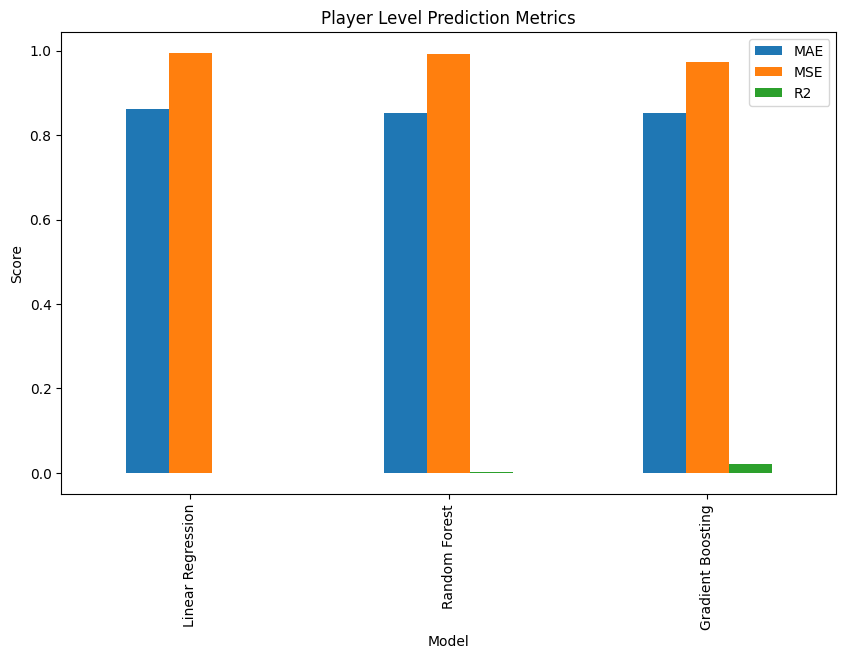

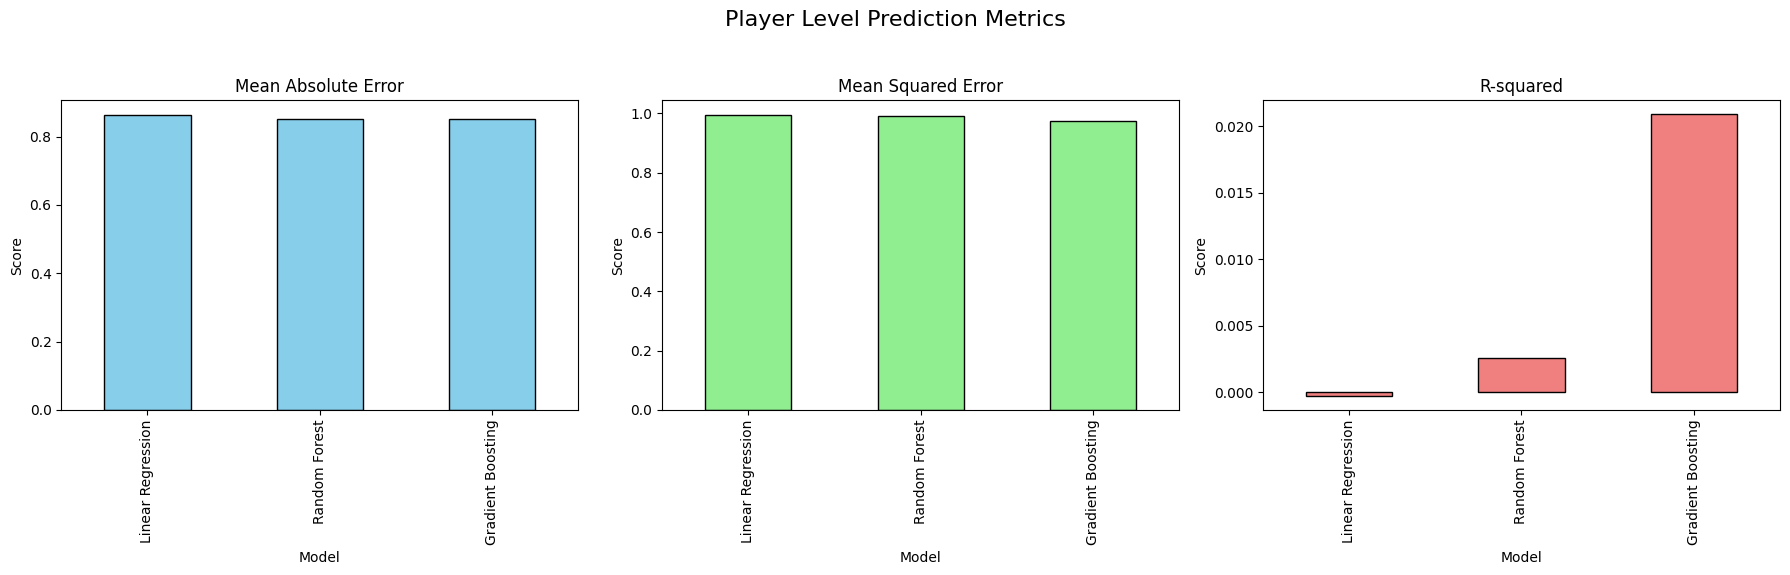

In [52]:
# Train and evaluate Linear Regression for Player Level
lin_reg.fit(X_train_level, y_train_level)
y_pred_lin_reg_level = lin_reg.predict(X_test_level)
lin_reg_level_metrics = {
    'Model': 'Linear Regression',
    'MAE': mean_absolute_error(y_test_level, y_pred_lin_reg_level),
    'MSE': mean_squared_error(y_test_level, y_pred_lin_reg_level),
    'R2': r2_score(y_test_level, y_pred_lin_reg_level)
}
print("Linear Regression Predictions (Level):", y_pred_lin_reg_level)

# Train and evaluate Random Forest for Player Level
rf_reg.fit(X_train_level, y_train_level)
y_pred_rf_reg_level = rf_reg.predict(X_test_level)
rf_reg_level_metrics = {
    'Model': 'Random Forest',
    'MAE': mean_absolute_error(y_test_level, y_pred_rf_reg_level),
    'MSE': mean_squared_error(y_test_level, y_pred_rf_reg_level),
    'R2': r2_score(y_test_level, y_pred_rf_reg_level)
}
print("Random Forest Predictions (Level):", y_pred_rf_reg_level)

# Train and evaluate Gradient Boosting for Player Level
gb_reg.fit(X_train_level, y_train_level)
y_pred_gb_reg_level = gb_reg.predict(X_test_level)
gb_reg_level_metrics = {
    'Model': 'Gradient Boosting',
    'MAE': mean_absolute_error(y_test_level, y_pred_gb_reg_level),
    'MSE': mean_squared_error(y_test_level, y_pred_gb_reg_level),
    'R2': r2_score(y_test_level, y_pred_gb_reg_level)
}
print("Gradient Boosting Predictions (Level):", y_pred_gb_reg_level)

# Collecting metrics
level_metrics_df = pd.DataFrame([lin_reg_level_metrics, rf_reg_level_metrics, gb_reg_level_metrics])

# Displaying Level Metrics
print("Player Level Prediction Metrics")
print(level_metrics_df)

# Plotting Level Metrics
level_metrics_df.set_index('Model')[['MAE', 'MSE', 'R2']].plot(kind='bar', figsize=(10, 6))
plt.title('Player Level Prediction Metrics')
plt.ylabel('Score')
plt.show()

# Plotting Level Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE
level_metrics_df.set_index('Model')['MAE'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('Score')

# MSE
level_metrics_df.set_index('Model')['MSE'].plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Mean Squared Error')
axes[1].set_ylabel('Score')

# R2
level_metrics_df.set_index('Model')['R2'].plot(kind='bar', ax=axes[2], color='lightcoral', edgecolor='black')
axes[2].set_title('R-squared')
axes[2].set_ylabel('Score')

plt.suptitle('Player Level Prediction Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Model Evaluation for In-Game Purchases (Regression)

This block evaluates linear regression, random forest, and gradient boosting models for predicting in-game purchases. The models are assessed using the RMSE (Root Mean Squared Error) metric

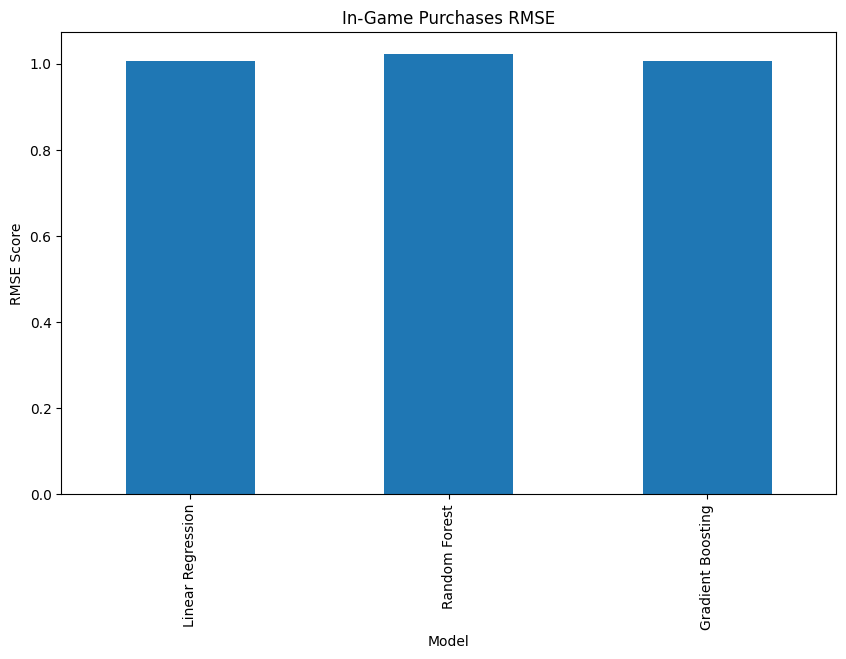

In [53]:
# Calculate RMSE
rmse_lin_reg = np.sqrt(mean_squared_error(y_test_purchases, y_pred_lin_reg))
rmse_rf_reg = np.sqrt(mean_squared_error(y_test_purchases, y_pred_rf_reg))
rmse_gb_reg = np.sqrt(mean_squared_error(y_test_purchases, y_pred_gb_reg))

# Add RMSE to the metrics dictionary
lin_reg_metrics['RMSE'] = rmse_lin_reg
rf_reg_metrics['RMSE'] = rmse_rf_reg
gb_reg_metrics['RMSE'] = rmse_gb_reg

# Add RMSE to the metrics DataFrame
purchases_metrics_df = pd.DataFrame([lin_reg_metrics, rf_reg_metrics, gb_reg_metrics])

# Plotting RMSE
purchases_metrics_df.set_index('Model')['RMSE'].plot(kind='bar', figsize=(10, 6))
plt.title('In-Game Purchases RMSE')
plt.ylabel('RMSE Score')
plt.show()
